dataset: https://www.yelp.com/dataset

In [1]:
from helpers import *

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis

All the files from the dataset are coming in the json format.
In the helpers.py files there is a function which transforms this to pandas dataframe, also saving this file in csv format.

In [3]:
reviews = pd.read_csv(f'{path}REVIEWS.csv', sep=';')
print(f'''
Rows:\t{reviews.shape[0]}
Columns:\t{reviews.shape[1]}
''')

C:\Users\miska\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,4,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Rows:	6075267
Columns:	9



In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075267 entries, 0 to 6075266
Data columns (total 9 columns):
business_id    object
cool           float64
date           object
funny          float64
review_id      object
stars          float64
text           object
useful         float64
user_id        object
dtypes: float64(4), object(5)
memory usage: 417.2+ MB


In [4]:
reviews.head(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0.0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0.0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1.0,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0.0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0.0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g


For project purposes only two columns: text and stars will be useful. "text" column contains comments and "stars" would be using the identify the sentiment.
To see some concrete examples, I will take rows with index 4 and 2. The first one is a positive sentiment and second is negative.

In [7]:
#printing comments of 4 and 2
print('Positive:')
print(reviews.loc[4, 'text'])
print('----------------------')
print('Negative:')
print(reviews.loc[2, 'text'])

Positive:
Delicious healthy food. The steak is amazing. Fish and pork are awesome too. Service is above and beyond. Not a bad thing to say about this place. Worth every penny!
----------------------
Negative:
Terrible. Dry corn bread. Rib tips were all fat and mushy and had no flavor. If you want bbq in this neighborhood go to john mulls roadkill grill. Trust me.


As seen above "stars" columns is a quantative representation of the comment itself. For simplification purposes, comments with stars >= 4 will be considered as positive, comments with stars value equals or less than 2 - are negative.
To check whether 3 is positve, neutral or negative, a subset will be created in order to make a "sense" check

In [5]:
three_stars = reviews[reviews["stars"] == 3.].reset_index(drop=True)
three_stars = three_stars.loc[:, ('text', 'stars')]

In [7]:
#printing out some of the comments:
randomizer = np.random.randint(len(three_stars), size=10).tolist()
for i in randomizer:
    print(f'Comment #{i}:')
    print(three_stars.loc[i, 'text'])
    print('-------------------------------------------------------')

Comment #596017:
Huh.  Dang.  Darn it.  Shoot.  I was really looking forward to lunch here.  Parking at this location is beyond ridiculous, no, I didn't valet cause I wanted to shop after wards.  But who cares?  I was here for a great meal!  Things started off well, great folks at the hostess desk.  Attractive interior, beautiful dark rich woods, attractive lighting, dark plantation blinds, very nice table.  My server Paula was extremely nice and had the cutest accent.  I liked a lot of the choices on the menu, but on an impulse, decided on the salad with filet medallions and onions straws.  The first bite of steak was extraordinary, perfectly cooked, wonderful seasonings and flavor.  Fresh pieces of asparagus in the salad was a nice surprise.  Then the shocker.  The next medallion was under cooked, the next was over cooked and the rest were grisley.  Needless to say, I could not eat it.  My server was very apologetic.  And then the manager immediately appeared as if he had been shot o

Comments with 3 stars are more neutral, rather than positive or negative.
Taking this into account: 
1-2: negative;
3: neutral;
4-5: positive
With that a new feature will be created to show the sentiment

In [4]:
reviews['sentiment'] = reviews['stars'].map({0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 2})

In [7]:
reviews.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment
0,iCQpiavjjPzJ5_3gPD5Ebg,0.0,2011-02-25,0.0,x7mDIiDB3jEiPGPHOmDzyw,2.0,The pizza was okay. Not the best I've had. I p...,0.0,msQe1u7Z_XuqjGoqhB0J5g,0.0
1,pomGBqfbxcqPv14c3XH-ZQ,0.0,2012-11-13,0.0,dDl8zu1vWPdKGihJrwQbpw,5.0,I love this place! My fiance And I go here atl...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2.0
2,jtQARsP6P-LbkyjbO1qNGg,1.0,2014-10-23,1.0,LZp4UX5zK3e-c5ZGSeo3kA,1.0,Terrible. Dry corn bread. Rib tips were all fa...,3.0,msQe1u7Z_XuqjGoqhB0J5g,0.0
3,elqbBhBfElMNSrjFqW3now,0.0,2011-02-25,0.0,Er4NBWCmCD4nM8_p1GRdow,2.0,Back in 2005-2007 this place was my FAVORITE t...,2.0,msQe1u7Z_XuqjGoqhB0J5g,0.0
4,Ums3gaP2qM3W1XcA5r6SsQ,0.0,2014-09-05,0.0,jsDu6QEJHbwP2Blom1PLCA,5.0,Delicious healthy food. The steak is amazing. ...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2.0
5,vgfcTvK81oD4r50NMjU2Ag,0.0,2011-02-25,0.0,pfavA0hr3nyqO61oupj-lA,1.0,This place sucks. The customer service is horr...,2.0,msQe1u7Z_XuqjGoqhB0J5g,0.0
6,AxeQEz3-s9_1TyIo-G7UQw,0.0,2011-10-10,0.0,brokEno2n7s4vrwmmUdr9w,5.0,"If you like Thai food, you have to try the ori...",1.0,msQe1u7Z_XuqjGoqhB0J5g,2.0
7,zdE82PiD6wquvjYLyhOJNA,0.0,2012-04-18,1.0,kUZWBVZvhWuC8TWUg5AYyA,5.0,AMAZING!!!\r\n\r\n I was referred here by a fr...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2.0
8,EAwh1OmG6t6p3nRaZOW_AA,0.0,2011-02-25,0.0,wcqt0III88LEcm19IxFFyA,4.0,Ribs = amazing\r\n2 hour wait time= not so ama...,0.0,msQe1u7Z_XuqjGoqhB0J5g,2.0
9,atVh8viqTj-sqDJ35tAYVg,1.0,2012-11-09,2.0,LWUtqzNthMM3vpWZIFBlPw,2.0,"Food is pretty good, not gonna lie. BUT you ha...",1.0,msQe1u7Z_XuqjGoqhB0J5g,0.0


Before starting dataset should be splitted for training, validation and test set. This isn't valid for unsupervised model, where only test set will be used.
To make sure that model isn't biased, we need to make sure that not only positive or negative/neutral comments are represented is dataset. 
To check it, we can plot a histogram for the "stars" column.

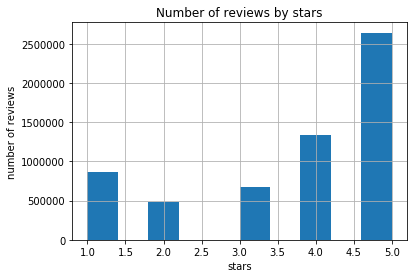

In [62]:
reviews["stars"].hist()
plt.title('Number of reviews by stars')
plt.xlabel('stars')
plt.ylabel('number of reviews')
plt.show()

As shown on the histogram - **dataset is tend to have more positve comments**. In total we have around 4 mlns of positve comments, ~700k of neutral comments and almost 1 million and a half of negative. To prepare a good training set we should leave it proportinally.
It means that some part of positive comments should be left outside of the dataset, it could be then used as well to test the algorithm. 

In [9]:
total_positives = reviews[reviews["sentiment"] == 2.]
print(f'Positives: {len(total_positives)}, which is {np.round(len(total_positives)/len(reviews), 2) * 100} % of the dataset ')

Positives: 3977837, which is 65.0 % of the dataset 


Let's also create a comment lenght column, to make sure that those records that left behind don't have any pattern, for instance, they are short comments, or long comments

In [5]:
reviews['length'] = [len(str(x)) for x in reviews['text']]

In [11]:
reviews.length.describe()

count    6.075267e+06
mean     5.970125e+02
std      5.665232e+02
min      1.000000e+00
25%      2.330000e+02
50%      4.220000e+02
75%      7.650000e+02
max      5.354000e+03
Name: length, dtype: float64

The mean value for the length is around 600 symbols.

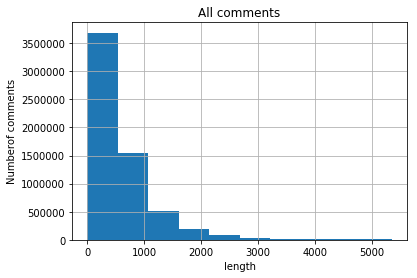

In [63]:
reviews["length"].hist()
plt.title('All comments')
plt.xlabel('length')
plt.ylabel('Numberof comments')
plt.show()

Text(0.5,1,'Only positive comments')

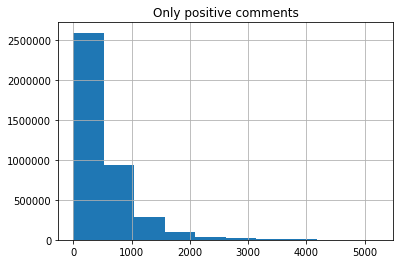

In [59]:
#checking lenght for positive comments:
total_positives = reviews[reviews["sentiment"] == 2.]


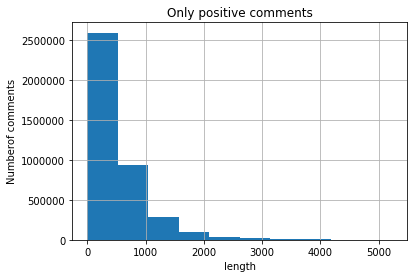

In [64]:
total_positives["length"].hist()
plt.title('Only positive comments')
plt.xlabel('length')
plt.ylabel('Numberof comments')
plt.show()

In [6]:
reviews = reviews.loc[:, ('review_id', 'text', 'stars', 'sentiment', 'length')]

As we can see by graphs above, they look more or less the same, however, the correlation between length and number of stars still should be checked.
For this:
1. Let's compute pairwise of columns;
2. Let's build a stack bar chart with all five categories, which will be divided by bins beforehand.

In [15]:
reviews.corrwith(reviews['length'])

stars       -0.193202
sentiment   -0.175908
length       1.000000
dtype: float64

As we can see above there is no correlation between number of stars and length.

To build a stack bar chart, first I will split the dataset to the bins. 500 was taken as a bin size, so at the end there will be 11 bins.

In [7]:
bins = pd.cut(reviews['length'], 11, labels=np.arange(11))
reviews['bin'] = bins
reviews['bin'].unique()

[0, 1, 2, 4, 3, ..., 9, 5, 6, 8, 10]
Length: 11
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

In [17]:
reviews.head(10)

,review_id,text,stars,sentiment,length,bin
0,x7mDIiDB3jEiPGPHOmDzyw,The pizza was okay. Not the best I've had. I p...,2.0,0.0,450,0
1,dDl8zu1vWPdKGihJrwQbpw,I love this place! My fiance And I go here atl...,5.0,2.0,317,0
2,LZp4UX5zK3e-c5ZGSeo3kA,Terrible. Dry corn bread. Rib tips were all fa...,1.0,0.0,156,0
3,Er4NBWCmCD4nM8_p1GRdow,Back in 2005-2007 this place was my FAVORITE t...,2.0,0.0,901,1
4,jsDu6QEJHbwP2Blom1PLCA,Delicious healthy food. The steak is amazing. ...,5.0,2.0,165,0
5,pfavA0hr3nyqO61oupj-lA,This place sucks. The customer service is horr...,1.0,0.0,467,0
6,brokEno2n7s4vrwmmUdr9w,"If you like Thai food, you have to try the ori...",5.0,2.0,749,1
7,kUZWBVZvhWuC8TWUg5AYyA,AMAZING!!!\r\n\r\n I was referred here by a fr...,5.0,2.0,1200,2
8,wcqt0III88LEcm19IxFFyA,Ribs = amazing\r\n2 hour wait time= not so ama...,4.0,2.0,340,0
9,LWUtqzNthMM3vpWZIFBlPw,"Food is pretty good, not gonna lie. BUT you ha...",2.0,0.0,1003,2


Next grouping everything by bin and stars and build a bar stack chart

In [18]:
grouping = reviews.groupby(['bin', 'stars'])['review_id'].count().reset_index(level=[0, 1]).rename(columns={'review_id': 'count'})

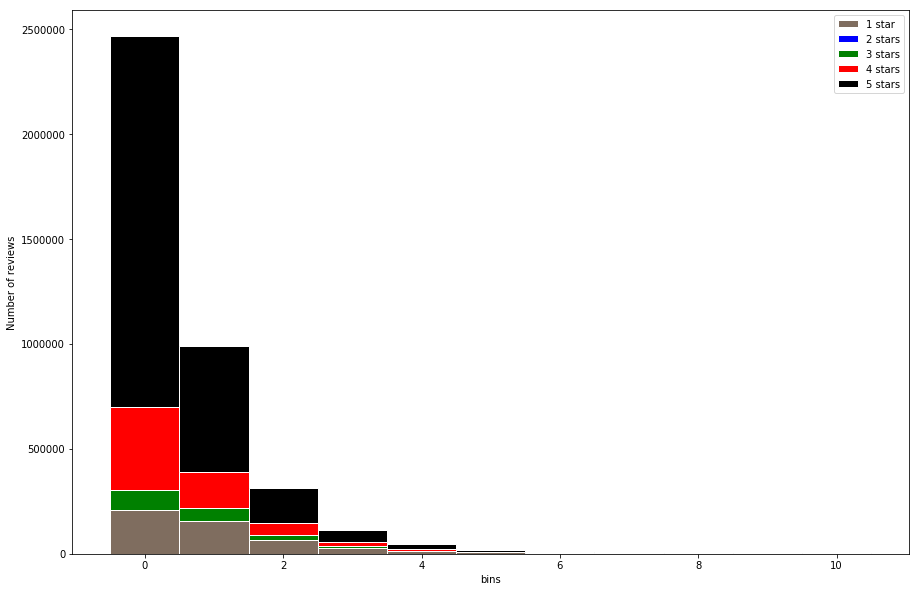

In [61]:
star_1 = grouping[grouping.stars == 1.].reset_index()
star_2 = grouping[grouping.stars == 2.].reset_index()
star_3 = grouping[grouping.stars == 3.].reset_index()
star_4 = grouping[grouping.stars == 4.].reset_index()
star_5 = grouping[grouping.stars == 5.].reset_index()
barWidth = 1
fig = plt.figure(figsize=(15, 10))
plt.bar(star_1['bin'], star_1['count'], color='#7f6d5f', edgecolor='white', width=barWidth, label='1 star')
plt.bar(star_1['bin'], star_2['count'], bottom=star_1['count'], color='blue', edgecolor='white', width=barWidth, label='2 stars')
plt.bar(star_1['bin'], star_3['count'], bottom=star_2['count'], color='green', edgecolor='white', width=barWidth, label='3 stars')
plt.bar(star_1['bin'], star_4['count'], bottom=star_3['count'], color='red', edgecolor='white', width=barWidth, label='4 stars')
plt.bar(star_1['bin'], star_5['count'], bottom=star_4['count'], color='black', edgecolor='white', width=barWidth, label='5 stars')
plt.ylabel('Number of reviews')
plt.xlabel('bins')
plt.legend()
plt.show()


This bar chart was built to identify if there is any tendency or correlation between length and number of stars. There is no clear correlation, 
but **interestingly** that still when comment is long - it's more likely that it's either 1 or 5 stars. Also there seem to be very few comments with 2 stars.

In [8]:
reviews['stars'].value_counts()

5.0    2641880
4.0    1335957
1.0     870850
3.0     673206
2.0     487813
0.0          1
Name: stars, dtype: int64

Let's check how many comments are blank, also let's check one comments with 0 stars - those comments will be removed from dataset

In [9]:
reviews[reviews['stars'] == 0]

,review_id,text,stars,sentiment,length,bin
4823211,QW01qOsaqlxMKoMazOw1Bg,NaN,0.0,0.0,3,0


In [10]:
reviews = reviews.drop([4823211], axis=0).reset_index(drop=True)

In [11]:
reviews['stars'].value_counts()

5.0    2641880
4.0    1335957
1.0     870850
3.0     673206
2.0     487813
Name: stars, dtype: int64

0 star row isn't represented in dataset anymore

In [12]:
reviews[reviews.length == 0]

,review_id,text,stars,sentiment,length,bin


There was no empty comments in the dataset.

In [13]:
#Saving dataset
reviews.to_csv('reviews.csv', sep=';', index=False)

The work continues in 'capstonePreprocessing' jupyter workbook.

In [114]:
#Checking memory load
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('X_train', 1719979235),
 ('X_val', 651275008),
 ('X_test', 644880041),
 ('indexes', 215555574),
 ('test_neu', 116873588),
 ('validate_neu', 116836424),
 ('text_data', 19836760),
 ('text_data_train', 19836760),
 ('y_train', 19821304),
 ('prep', 6871992),
 ('text_data_test', 6871992),
 ('y_test', 6607184),
 ('y_val', 6607176),
 ('bins', 6075779),
 ('corpus', 3813304),
 ('en_stop', 8416),
 ('CountVectorizer', 1464),
 ('grouping', 1464),
 ('English', 1184),
 ('WordNetLemmatizer', 1056),
 ('star_1', 787),
 ('star_2', 787),
 ('star_3', 787),
 ('star_4', 787),
 ('star_5', 787),
 ('t', 640),
 ('l', 432),
 ('s', 344),
 ('test', 344),
 ('str1', 292),
 ('tokens', 264),
 ('f', 216),
 ('fp', 176),
 ('get_lemma', 136),
 ('get_lemma2', 136),
 ('prepare_text', 136),
 ('read_convert_json', 136),
 ('file', 82),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('sns', 80),
 ('path', 77),
 ('cv', 56),
 ('fig', 56),
 ('parser', 56),
 ('wn', 56),
 ('barWidth', 28)]